<a href="https://colab.research.google.com/github/DanimarCosta/Backup_Python/blob/main/Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A hipotese é de que o sexo feminino com menos de 20 anos de idade, na cidade de Joinville possuem a maior nota em redação, uma media de 646.24 Pts
A vantagem da cidade de Joinville foi de 21.76 Pts em relacao a outra cidade.


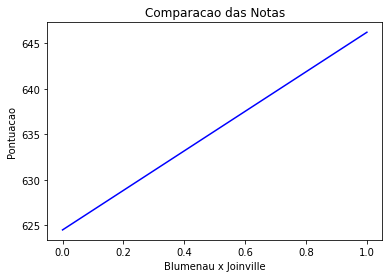

A hipotese de que as regioes sul e do vale tiveram um desempenho maior do que a media do estado sao verdadeiras, a media foi de 602.79 Pts
Uma vantagem de 24.78 Pts em relacao ao estado.


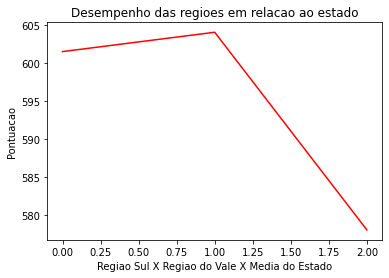

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importando o arquivo e transformando em um data frame 
database = pd.read_csv(
"https://docs.google.com/spreadsheets/d/e/2PACX-1vTXV5RIG8L_r46KHNGq9i_zc6zep-rlDkUGTRSBga0ZESGbJQS4tBibW_5fGAoi1b_qPgAgVx0TRPYS/pub?output=csv", sep=',', encoding='utf8')
 
# Filtro de dados
# Dados Joinville
arquivos = pd.DataFrame(database)
arquivos.set_index("NO_MUNICIPIO_RESIDENCIA")
redacao_media_estado = database.NU_NOTA_REDACAO.mean()
 
Joinville = arquivos[
  (arquivos["NO_MUNICIPIO_RESIDENCIA"] == "Joinville")
  &
  (arquivos["NU_NOTA_REDACAO"] > 100)
  &
  (arquivos["TP_SEXO"] == "F")
  &
  (arquivos["NU_IDADE"] < 20)
]
 
Joinville.set_index("NO_MUNICIPIO_RESIDENCIA")
redacao_Joinville = Joinville.NU_NOTA_REDACAO.mean()
 
# Dados Blumenau
Blumenau = arquivos[
  (arquivos["NO_MUNICIPIO_RESIDENCIA"] == "Blumenau")
  &
  (arquivos["NU_NOTA_REDACAO"] > 100)
  &
  (arquivos["TP_SEXO"] == "F")
  &
  (arquivos["NU_IDADE"] < 20)
]
Blumenau.set_index("NO_MUNICIPIO_RESIDENCIA")
redacao_Blumenau = Blumenau.NU_NOTA_REDACAO.mean()
 
# Comparacao dos dados
if redacao_Blumenau > redacao_Joinville:
  cidade_maior_nota = "Blumenau"
  pontuacao = redacao_Blumenau
  sub = redacao_Blumenau - redacao_Joinville
else:
  cidade_maior_nota = "Joinville"
  pontuacao =  redacao_Joinville
  sub = redacao_Joinville - redacao_Blumenau
 
# Limita as casas decimais, importante para a visualizacao mais clara dos dados
sub = round(sub, 2)
pontuacao = round(pontuacao, 2)
 
print("A hipotese é de que o sexo feminino com menos de 20 anos de idade, na cidade de", cidade_maior_nota, "possuem a maior nota em redação, uma media de", pontuacao, "Pts")
print("A vantagem da cidade de", cidade_maior_nota, "foi de", sub, "Pts em relacao a outra cidade.")
 
# MatPlotLib - Cria um grafico 
plt.plot( [redacao_Blumenau, redacao_Joinville], color="blue" )
plt.title("Comparacao das Notas")
plt.xlabel("Blumenau x Joinville")
plt.ylabel("Pontuacao")
 
# Salva o grafico em um arquivo
plt.savefig("Grafico_Redacao") 
plt.show()
 
# ----------------------------------------------------------------Comparacao de regioes-------------------------------------------------------------------
# ---Regiao Sul---
Laguna = arquivos[
  (arquivos["NO_MUNICIPIO_RESIDENCIA"] == "Laguna")
  &
  (arquivos["NU_NOTA_REDACAO"] > 100)
  &
  (arquivos["NU_IDADE"] < 25)
]
 
Orleans = arquivos[
  (arquivos["NO_MUNICIPIO_RESIDENCIA"] == "Orleans")
  &
  (arquivos["NU_NOTA_REDACAO"] > 100)
  &
  (arquivos["NU_IDADE"] < 25)
]
 
Laguna.set_index("NO_MUNICIPIO_RESIDENCIA")
Orleans.set_index("NO_MUNICIPIO_RESIDENCIA")
redacao_Laguna = Laguna.NU_NOTA_REDACAO.mean()
redacao_Orleans = Orleans.NU_NOTA_REDACAO.mean()
 
redacao_Sul = (redacao_Laguna + redacao_Orleans) / 2 # Calcula a media das cidades selecionadas do Sul de Santa Catarina
 
# ---Regiao do Vale---
Pomerode = arquivos[
  (arquivos["NO_MUNICIPIO_RESIDENCIA"] == "Pomerode")
  &
  (arquivos["NU_NOTA_REDACAO"] > 100)
  &
  (arquivos["NU_IDADE"] < 25)
]
 
Brusque = arquivos[
  (arquivos["NO_MUNICIPIO_RESIDENCIA"] == "Brusque")
  &
  (arquivos["NU_NOTA_REDACAO"] > 100)
  &
  (arquivos["NU_IDADE"] < 25)
]
 
Brusque.set_index("NO_MUNICIPIO_RESIDENCIA")
Pomerode.set_index("NO_MUNICIPIO_RESIDENCIA")
redacao_Pomerode = Pomerode.NU_NOTA_REDACAO.mean()
redacao_Brusque = Brusque.NU_NOTA_REDACAO.mean()
 
redacao_Vale = (redacao_Pomerode + redacao_Brusque) / 2 # Calcula a media das cidades selecionadas do Sul de Santa Catarina
redacao_regioes = (redacao_Vale + redacao_Sul) / 2
redacao_regioes = round(redacao_regioes, 2)
 
if redacao_regioes > redacao_media_estado:
  pontuacao = redacao_regioes - redacao_media_estado
  pontuacao = round(pontuacao, 2)
  print("A hipotese de que as regioes sul e do vale tiveram um desempenho maior do que a media do estado sao verdadeiras, a media foi de", redacao_regioes, "Pts")
  print("Uma vantagem de", pontuacao, "Pts em relacao ao estado.")
 
else:
  pontuacao = redacao_media_estado - redacao_regioes
  pontuacao = round(pontuacao, 2)
  print("A hipotese de que as regioes sul e do vale Catarinense tiveram um desempenho maior do que a media do estado sao Falsas, a media foi de", redacao_regioes, "Pts")
  print("Uma desvantagem de", pontuacao, "Pts em relacao ao estado.") 
 
# MatplotLib - Cria um grafico
plt.plot( [redacao_Sul, redacao_Vale, redacao_media_estado], color="red" )
plt.title("Desempenho das regioes em relacao ao estado")
plt.xlabel("Regiao Sul X Regiao do Vale X Media do Estado")
plt.ylabel("Pontuacao")
 
# Salva o grafico em um arquivo
plt.savefig("Grafico_Redacao_regioes") 
plt.show()